In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import pandas as pd

sys.path.append(r'..\Interpolation_networks\interpolation_without_CNN\pytorch_implementation_wo_sliding')
from pointcloud_utils_functions_v2 import *

In [8]:
kitti_annot_path = r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\Datasets LIDAR\kitti\kitti_3d_object\training\label_2'
kitti_pointcloud_path = r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\Datasets LIDAR\kitti\kitti_3d_object\training\velodyne'

In [70]:
object_count_list = []
for filepath in os.listdir(kitti_annot_path):
    with open(os.path.join(kitti_annot_path, filepath)) as f:
        line = f.readlines()
        obj = [label.split(sep=' ')[0] for label in line]
        object_count_list = object_count_list + obj

In [82]:
conteo = {'Car':0,'Van':0, 'Truck':0,'Pedestrian':0, 'Person_sitting':0, 'Cyclist':0,'Tram':0, 'Misc':0, 'DontCare':0}
for label in object_count_list:
    conteo[label] += 1

print(conteo)
dont_care = conteo.pop('DontCare')
conteo['Misc'] += dont_care
conteo['Misc or DontCare'] = conteo.pop('Misc')
conteo

{'Car': 28742, 'Van': 2914, 'Truck': 1094, 'Pedestrian': 4487, 'Person_sitting': 222, 'Cyclist': 1627, 'Tram': 511, 'Misc': 973, 'DontCare': 11295}


{'Car': 28742,
 'Van': 2914,
 'Truck': 1094,
 'Pedestrian': 4487,
 'Person_sitting': 222,
 'Cyclist': 1627,
 'Tram': 511,
 'Misc or DontCare': 12268}

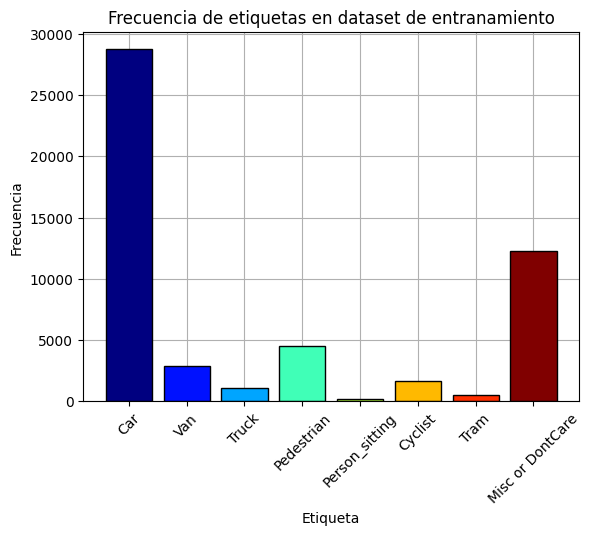

In [83]:
valores = list(conteo.keys())
frecuencias = list(conteo.values())
# Colores para cada barra
colores = plt.cm.jet(np.linspace(0, 1, len(valores)))  # Usando una paleta de colores predefinida (viridis)

# Crear el histograma
plt.bar(valores, frecuencias, color=colores, edgecolor='black', zorder=2)

# Agregar etiquetas y título
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.title('Frecuencia de etiquetas en dataset de entranamiento')
plt.grid(zorder=1)

# Mostrar el histograma
plt.show()

In [3]:
#Ejemplo de etiqueta
ejemplo = '002444'

label_path = os.path.join(kitti_annot_path, rf'{ejemplo}.txt')
label_file = pd.read_csv(label_path, sep=" ", names=['label', 'truncated', 'occluded', 'alpha', 'bbox_xmin', 'bbox_ymin', 'bbox_xmax', 'bbox_ymax', 'dim_height', 'dim_width', 'dim_length', 'loc_x', 'loc_y', 'loc_z', 'rotation_y'])
label_file

,label,truncated,occluded,alpha,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,dim_height,dim_width,dim_length,loc_x,loc_y,loc_z,rotation_y
0,Car,0.0,0,-1.53,558.02,183.32,614.08,229.33,1.36,1.69,3.38,-0.76,1.72,23.58,-1.56
1,Car,0.0,0,-2.42,150.74,173.76,395.89,277.66,1.66,1.63,3.83,-6.00,1.70,12.85,-2.85
2,Car,0.0,1,-2.32,365.24,179.81,484.51,226.55,1.45,1.61,3.96,-6.30,1.71,24.25,-2.57
3,Car,0.0,2,-2.28,402.45,181.27,500.84,220.10,1.36,1.57,3.73,-6.06,1.70,27.28,-2.50
4,Car,0.0,0,-1.48,517.68,183.35,563.31,213.16,1.25,1.74,3.66,-3.14,1.74,32.88,-1.58
5,Van,0.0,3,-1.75,652.18,142.38,757.14,238.31,2.42,2.03,5.49,2.54,1.68,21.12,-1.63
6,Van,0.0,3,1.90,317.07,162.77,406.52,220.27,2.10,1.96,4.63,-9.83,1.76,28.87,1.57
7,Car,0.0,2,-1.56,578.79,178.19,617.91,213.89,1.52,1.67,3.61,-0.55,1.77,32.80,-1.58
8,Cyclist,0.0,3,2.07,188.65,178.15,221.05,211.45,1.48,0.60,1.59,-18.52,1.73,32.94,1.56
9,DontCare,-1.0,-1,-10.00,628.31,177.10,676.27,215.68,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00


In [4]:
pointcloud = read_bin(os.path.join(kitti_pointcloud_path, rf'{ejemplo}.bin'))
pointcloud[2500:2510,:]

df = pd.DataFrame(pointcloud[2500:2510,:], columns=['X', 'Y', 'Z', 'I'])
df


,X,Y,Z,I
0,-10.005,17.726000,0.768,0.36
1,-10.073,17.716999,0.769,0.41
2,-10.143,17.709999,0.769,0.34
3,-10.211,17.700001,0.770,0.40
4,-10.264,17.728001,0.772,0.34
5,-10.326,17.705999,0.772,0.41
6,-10.384,17.677999,0.772,0.38
7,-10.463,17.684999,0.773,0.38
8,-10.530,17.671000,0.774,0.38
9,-10.599,17.660000,0.775,0.37


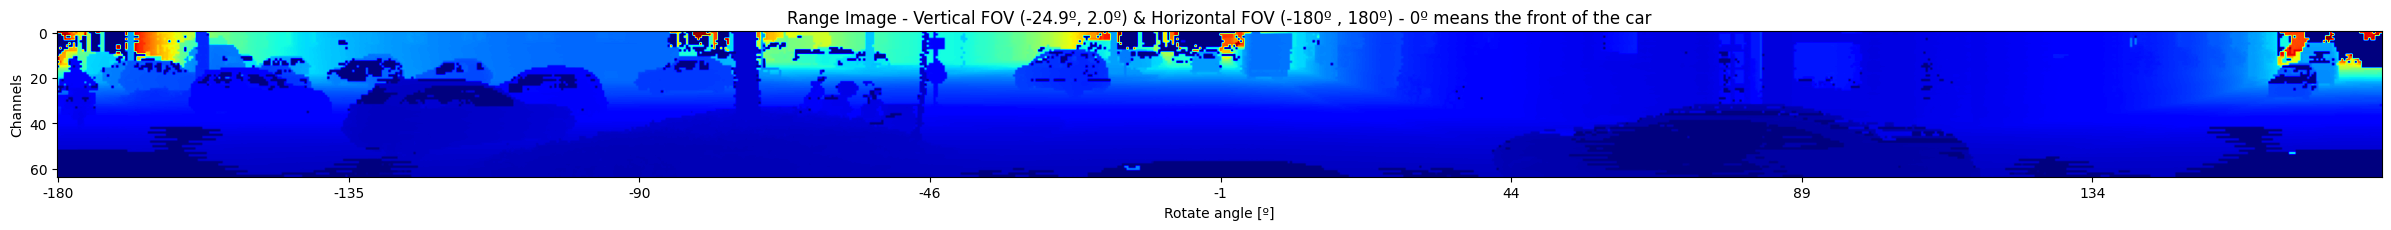

Size: (64, 1024)


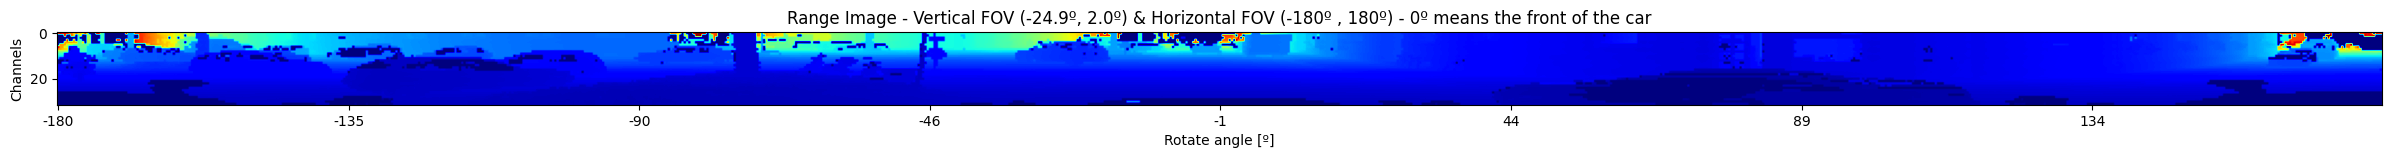

Size: (32, 1024)


In [5]:
range_image = pointcloud_to_range_image(pointcloud)
display_range_image(range_image)

indexes = range(0, 64, 2)
lrimg = range_image[indexes]
display_range_image(lrimg)

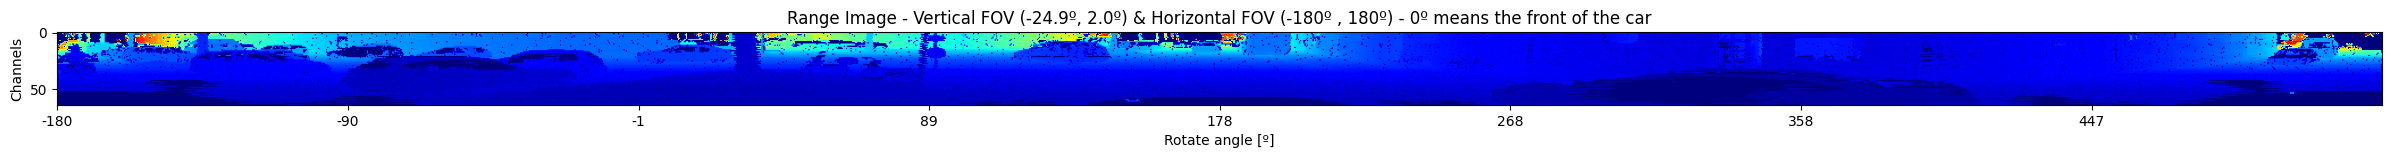

Size: (64, 2048)


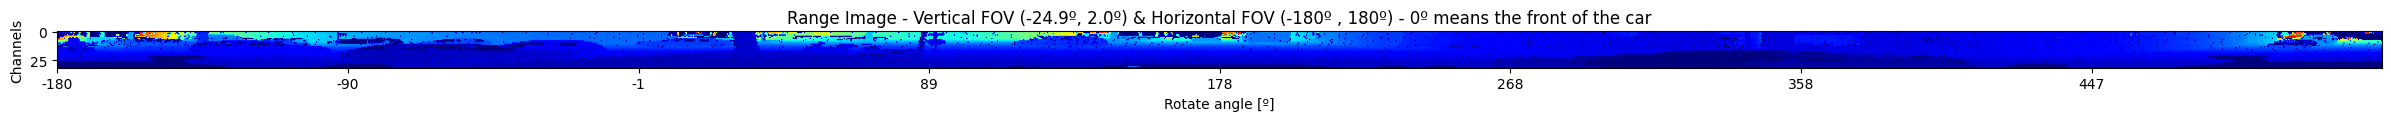

Size: (32, 2048)


In [64]:
range_image_2048 = pointcloud_to_range_image(pointcloud, size=(64, 2048))
display_range_image(range_image_2048)

lrimg_2048 = range_image_2048[indexes]
display_range_image(lrimg_2048)